## Check Basic Structure

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Mobile Reviews Sentiment.csv")

# Preview
df.head()


,review_id,customer_name,age,brand,model,price_usd,price_local,currency,exchange_rate_to_usd,rating,...,verified_purchase,battery_life_rating,camera_rating,performance_rating,design_rating,display_rating,review_length,word_count,helpful_votes,source
0,1,Aryan Maharaj,45,Realme,Realme 12 Pro,337.31,₹27996.73,INR,83.00,2,...,True,1,1,3,2,1,46,7,1,Amazon
1,2,Davi Miguel Sousa,18,Realme,Realme 12 Pro,307.78,R$1754.35,BRL,5.70,4,...,True,3,2,4,3,2,74,12,5,Flipkart
2,3,Pahal Balay,27,Google,Pixel 6,864.53,₹71755.99,INR,83.00,4,...,True,3,5,3,2,4,55,11,8,AliExpress
3,4,David Guzman,19,Xiaomi,Redmi Note 13,660.94,د.إ2425.65,AED,3.67,3,...,False,1,3,2,1,2,66,11,3,Amazon
4,5,Yago Leão,38,Motorola,Edge 50,792.13,R$4515.14,BRL,5.70,3,...,True,3,3,2,2,1,73,12,0,BestBuy


## understand dataset structure

In [2]:
# Check column names
df.columns


Index(['review_id', 'customer_name', 'age', 'brand', 'model', 'price_usd',
       'price_local', 'currency', 'exchange_rate_to_usd', 'rating',
       'review_text', 'sentiment', 'country', 'language', 'review_date',
       'verified_purchase', 'battery_life_rating', 'camera_rating',
       'performance_rating', 'design_rating', 'display_rating',
       'review_length', 'word_count', 'helpful_votes', 'source'],
      dtype='object')

In [3]:
# Check rows and columns count
df.shape


(50000, 25)

In [4]:
# Detailed info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   review_id             50000 non-null  int64  
 1   customer_name         50000 non-null  object 
 2   age                   50000 non-null  int64  
 3   brand                 50000 non-null  object 
 4   model                 50000 non-null  object 
 5   price_usd             50000 non-null  float64
 6   price_local           50000 non-null  object 
 7   currency              50000 non-null  object 
 8   exchange_rate_to_usd  50000 non-null  float64
 9   rating                50000 non-null  int64  
 10  review_text           50000 non-null  object 
 11  sentiment             50000 non-null  object 
 12  country               50000 non-null  object 
 13  language              50000 non-null  object 
 14  review_date           50000 non-null  object 
 15  verified_purchase  

In [5]:
df.columns


Index(['review_id', 'customer_name', 'age', 'brand', 'model', 'price_usd',
       'price_local', 'currency', 'exchange_rate_to_usd', 'rating',
       'review_text', 'sentiment', 'country', 'language', 'review_date',
       'verified_purchase', 'battery_life_rating', 'camera_rating',
       'performance_rating', 'design_rating', 'display_rating',
       'review_length', 'word_count', 'helpful_votes', 'source'],
      dtype='object')

## basic data validation

In [6]:
# Shape
print("Shape:", df.shape)

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Sentiment distribution
print("\nSentiment Distribution:\n", df['sentiment'].value_counts())


Shape: (50000, 25)

Missing Values:
 review_id               0
customer_name           0
age                     0
brand                   0
model                   0
price_usd               0
price_local             0
currency                0
exchange_rate_to_usd    0
rating                  0
review_text             0
sentiment               0
country                 0
language                0
review_date             0
verified_purchase       0
battery_life_rating     0
camera_rating           0
performance_rating      0
design_rating           0
display_rating          0
review_length           0
word_count              0
helpful_votes           0
source                  0
dtype: int64

Sentiment Distribution:
 sentiment
Positive    27540
Neutral     12549
Negative     9911
Name: count, dtype: int64


In [7]:
df = df.dropna(subset=['review_text', 'sentiment'])


## basic text cleaning

In [8]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z ]', '', text)
    return text

df['review_text'] = df['review_text'].astype(str)
df['review_text'] = df['review_text'].apply(clean_text)


## convert sentiment to numbers(label encoding)

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

print(le.classes_)


['Negative' 'Neutral' 'Positive']


## train test split

In [10]:
from sklearn.model_selection import train_test_split

X = df['review_text']
y = df['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## convert text to numbers(TF-IDF)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


## Train machine learning model

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Evaluate model

In [14]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1998
           1       1.00      1.00      1.00      2538
           2       1.00      1.00      1.00      5464

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



## verify no data leakage

In [15]:
# 1. Split first
X = df['review_text']
y = df['sentiment_encoded']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Fit TF-IDF ONLY on training data
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [16]:
tfidf.fit_transform(X)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 504090 stored elements and shape (50000, 144)>

## try multiple models

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))



Logistic Regression
Accuracy: 1.0

Naive Bayes
Accuracy: 1.0

SVM
Accuracy: 1.0


## create confusion matrix

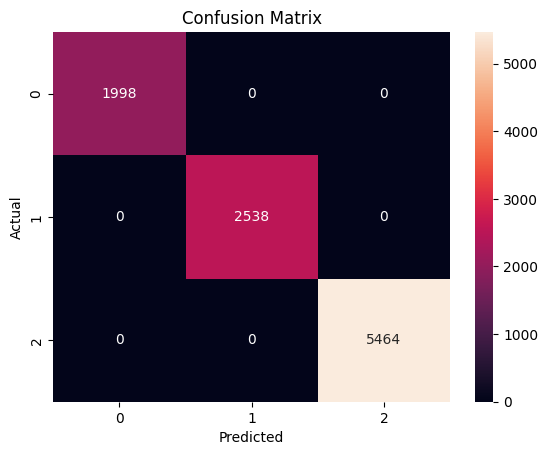

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## feature importance

In [19]:
feature_names = tfidf.get_feature_names_out()
coefs = model.coef_[0]

top_positive = sorted(zip(coefs, feature_names))[-20:]
top_negative = sorted(zip(coefs, feature_names))[:20]

print("Top Positive Words:", top_positive)
print("Top Negative Words:", top_negative)


Top Positive Words: [(np.float64(0.4248941554450552), 'standby'), (np.float64(0.4248941554450552), 'too'), (np.float64(0.42541522724926806), 'indoors'), (np.float64(0.42541522724926806), 'poor'), (np.float64(0.47668388614676377), 'hangs'), (np.float64(0.47668388614676377), 'regret'), (np.float64(0.5709902541677411), 'money'), (np.float64(0.5709902541677411), 'spent'), (np.float64(0.5777335578109567), 'muffled'), (np.float64(0.5777335578109567), 'speaker'), (np.float64(0.5862845067461766), 'to'), (np.float64(0.6240785742476699), 'often'), (np.float64(0.6760673900548244), 'mark'), (np.float64(0.6760673900548244), 'up'), (np.float64(0.8609947887161358), 'recommend'), (np.float64(0.8609947887161358), 'wouldnt'), (np.float64(0.909684428306497), 'disappointed'), (np.float64(0.91285946371165), 'very'), (np.float64(0.9177754812135259), 'returning'), (np.float64(0.9177754812135259), 'soon')]
Top Negative Words: [(np.float64(-0.6863632896088562), 'absolutely'), (np.float64(-0.659435901076922), '

## topic modeling

In [20]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_train_tfidf)


,n_components,5
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


## save model

In [21]:
import joblib

joblib.dump(model, "sentiment_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']